In [1]:
'''
@author: Joseph Taylor
201599999
'''

'\n@author: Joseph Taylor\n201599999\n'

In [2]:
import numpy as np # import numpy

# Lennard-Jones parameters (sigma in angstroms, epsilon in joules)

sigma_He = 2.56 # sigma He
epsilon_He = 1.41e-22 # epsilon He

sigma_N2 = 3.75 # sigma N2
epsilon_N2 = 1.32e-21 # epsilon N2

sigma_Ar = 3.40 # sigma Ar
epsilon_Ar = 1.66e-21 # epsilon Ar

sigma_Xe = 4.07 # sigma Xe
epsilon_Xe = 3.04e-21 # epsilon Xe

k = 1.381e-23 # Boltzmann constant (J/K)

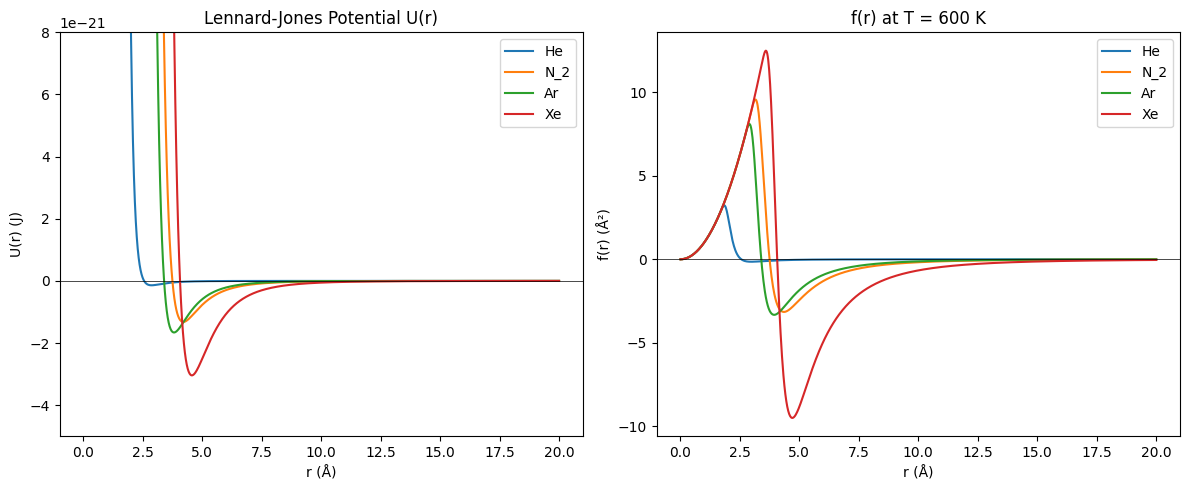

In [3]:
# 1. Plot U(r) and f(r)

import numpy as np # import numpy
import matplotlib.pyplot as plt # import matplotlib pyplot

T = 600  # set T to 600 Kelvin

def U(r, sigma, epsilon): # function outputting Leonard-Jones 6-12 potential and parameters
    return 4*epsilon*((sigma/r)**12 - (sigma/r)**6)

def f(r, sigma, epsilon): # function and parameters
    return (1 - np.exp(-U(r, sigma, epsilon)/(k*T))) * r**2

r = np.linspace(0.01, 20, 1000) # using discrete values of r

gases = {
    'He': (sigma_He, epsilon_He),
    'N_2': (sigma_N2, epsilon_N2),
    'Ar': (sigma_Ar, epsilon_Ar),
    'Xe': (sigma_Xe, epsilon_Xe),
}

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

for name, (sig, eps) in gases.items():
    ax1.plot(r, U(r, sig, eps), label=name)
    ax2.plot(r, f(r, sig, eps), label=name)

ax1.set_xlabel('r (Å)') # r on the x-axis
ax1.set_ylabel('U(r) (J)') # U(r) on the y-axis
ax1.set_title('Lennard-Jones Potential U(r)') # Figure title
ax1.set_ylim(-5e-21, 8e-21) # y limits
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.legend()

ax2.set_xlabel('r (Å)') # r on the x-axis
ax2.set_ylabel('f(r) (Å²)') # f(r) on the y-axis
ax2.set_title('f(r) at T = 600 K') # Figure title
ax2.axhline(y=0, color='k', linewidth=0.5)
ax2.legend()

plt.tight_layout()
plt.show() # Plot the graph

B2 for He = 17.3524 Å³ = 10.4496 cm³/mol
B2 for N_2 = 39.5292 Å³ = 23.8045 cm³/mol
B2 for Ar = 17.5034 Å³ = 10.5406 cm³/mol
B2 for Xe = -30.0861 Å³ = -18.1179 cm³/mol


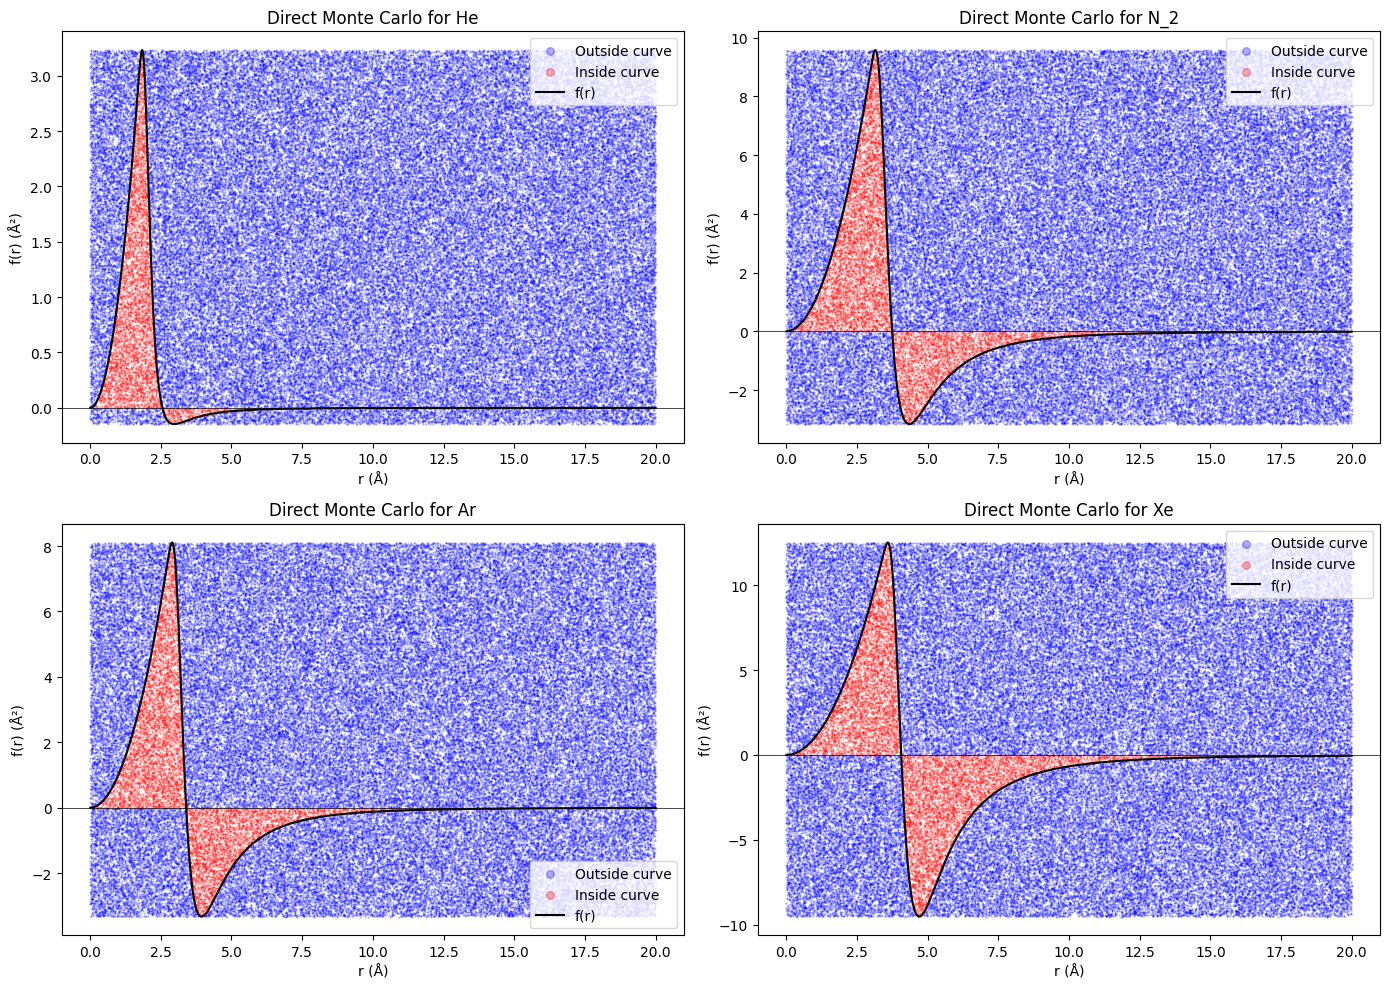

In [4]:
# 2. Calculate B_2 using the direct Monte Carlo method

import numpy as np # import numpy

n = 100000  # number of random guesses

r_max = 20.0  # upper limit of integration (Å)
r_min = 0.0   # lower limit of integration

r_vals = np.linspace(0.01, r_max, 10000) # r values between 0.01 and r max, 10000 total values

B2_results = {} # for storing B2 results
mc_points = {}  # for storing plotting points

for name, (sig, eps) in gases.items():
    f_vals = f(r_vals, sig, eps) # values of f
    f_min = np.min(f_vals) # minimum f
    f_max = np.max(f_vals) # maximum f

    box_area = (r_max - r_min) * (f_max - f_min) # calculate total area of the box

    positive_inside = 0 # counter for points inside curve where f(r) > 0
    negative_inside = 0 # counter for points inside curve where f(r) < 0
    inside_r, inside_y = [], []    # points inside the curve
    outside_r, outside_y = [], []  # points outside the curve

    for i in range(n):
        Rx = r_max * np.random.rand() # generate a random number between 0 and maximum r
        Ry = (f_max - f_min) * np.random.rand() + f_min # generate a random number between minimum and maximum f
        f_at_Rx = f(Rx, sig, eps) # calculate true value of f(r) at this random value of r

        is_inside = False
        if Ry >= 0 and Ry <= f_at_Rx: # if the point is greater than zero but below true value of f
            positive_inside += 1 # add one to counter
            is_inside = True
        elif Ry < 0 and Ry >= f_at_Rx: # if the point is less than zero but greater than truw value of f
            negative_inside += 1 # add one to counter
            is_inside = True

        if is_inside:
            inside_r.append(Rx)
            inside_y.append(Ry)
        else:
            outside_r.append(Rx)
            outside_y.append(Ry)

    integral = (positive_inside - negative_inside) / n * box_area # evaluate the approximation
    B2_val = 2 * np.pi * integral # calculate B2

    B2_results[name] = B2_val
    mc_points[name] = (inside_r, inside_y, outside_r, outside_y, f_min, f_max)
    print(f"B2 for {name} = {B2_val:.4f} Å³ = {B2_val * 1e-24 * 6.022e23:.4f} cm³/mol")

fig, axes = plt.subplots(2, 2, figsize=(14, 10)) # Plot Monte Carlo points for each gas

for ax, (name, (sig, eps)) in zip(axes.flatten(), gases.items()):
    inside_r, inside_y, outside_r, outside_y, f_min, f_max = mc_points[name]

    ax.scatter(outside_r, outside_y, s=0.3, c='blue', alpha=0.3, label='Outside curve')
    ax.scatter(inside_r, inside_y, s=0.3, c='red', alpha=0.3, label='Inside curve')
    ax.plot(r_vals, f(r_vals, sig, eps), 'k-', linewidth=1.5, label='f(r)')
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.set_xlabel('r (Å)')
    ax.set_ylabel('f(r) (Å²)')
    ax.set_title(f'Direct Monte Carlo for {name}')
    ax.legend(markerscale=10)

plt.tight_layout()
plt.show() # plot

In [5]:
# 3. Check your result by using numerical integration routine of Python

import scipy.integrate as integrate # import scipy integration function

B2_quad_results = {}

for name, (sig, eps) in gases.items():
    integral_quad = integrate.quad(f, 0, 20, args=(sig, eps))[0] # numerical integration of f(r) from 0 to 20
    B2_quad = 2 * np.pi * integral_quad # multiply by 2pi to get B2

    B2_quad_results[name] = B2_quad
    B2_mc = B2_results[name] # Monte Carlo result for comparison

    print(f"{name}:")
    print(f"  Monte Carlo:  B2 = {B2_mc:.4f} Å³ = {B2_mc * 1e-24 * 6.022e23:.4f} cm³/mol")
    print(f"  Quad:         B2 = {B2_quad:.4f} Å³ = {B2_quad * 1e-24 * 6.022e23:.4f} cm³/mol")
    print()

He:
  Monte Carlo:  B2 = 17.3524 Å³ = 10.4496 cm³/mol
  Quad:         B2 = 17.5543 Å³ = 10.5712 cm³/mol

N_2:
  Monte Carlo:  B2 = 39.5292 Å³ = 23.8045 cm³/mol
  Quad:         B2 = 37.9841 Å³ = 22.8740 cm³/mol

Ar:
  Monte Carlo:  B2 = 17.5034 Å³ = 10.5406 cm³/mol
  Quad:         B2 = 20.2871 Å³ = 12.2169 cm³/mol

Xe:
  Monte Carlo:  B2 = -30.0861 Å³ = -18.1179 cm³/mol
  Quad:         B2 = -28.3645 Å³ = -17.0811 cm³/mol



In [6]:
# 4. Compare your result for B2 to the literature



The accuracy of the Monte Carlo method depends on a few things.

The first factor is the number of random points used. Since the points are drawn from a uniform probability distribution, there's no guarantee that any finite sample will actually be evenly spread across the box, you could get clusters and gaps. But as you increase n, the points naturally fill the space more evenly, and the estimate converges toward the true value. The error decreases roughly as 1/sqrt(n), so you need 4 times as many points to halve the error.

Secondly, the size of the bounding box also matters. If the box is much larger than the area under the curve, most of the random points end up as misses and don't actually contribute to the estimate. A tighter box around the function means a higher proportion of useful points, which gives better accuracy for the same n. Hence the height of the box is set only to the maximum and minimum value of f(r).

Finally, the choice of integration limits affects the result. We

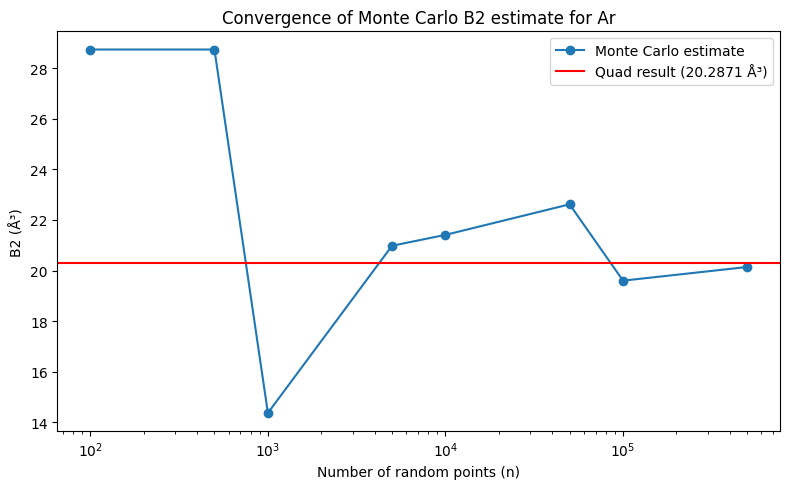

In [10]:
# 5. What determines the accuracy of your result and why?

Answer_5 = """The accuracy of the Monte Carlo method depends on a few things.

The first factor is the number of random points used. Since the points are drawn from a uniform probability distribution, \
there's no guarantee that any finite sample will actually be evenly spread across the box, you could get clusters and gaps. \
But as you increase n, the points naturally fill the space more evenly, and the estimate converges toward the true value. \
The error decreases roughly as 1/sqrt(n), so you need 4 times as many points to halve the error.

Secondly, the size of the bounding box also matters. If the box is much larger than the area under the curve, most of the random points \
end up as misses and don't actually contribute to the estimate. A tighter box around the function means a higher proportion of \
useful points, which gives better accuracy for the same n. Hence the height of the box is set only to the maximum and minimum value of f(r).

Finally, the choice of integration limits affects the result. We integrate from 0 to 20 angstroms, so if f(r) still had significant \
values beyond r = 20, we'd be cutting off part of the integral. In our case, f(r) is essentially zero well before r = 20."""

print(Answer_5)

# I will demonstrate the effect on accuracy by varying the number of random points shown. I will use Argon for this example.

sig, eps = sigma_Ar, epsilon_Ar # value of sigma and epsilon for Argon
B2_true = B2_quad_results['Ar']  # quad result as the "true" value

n_values = [100, 500, 1000, 5000, 10000, 50000, 100000, 500000] # different values for number of points
B2_estimates = []

f_vals_Ar = f(r_vals, sig, eps)
f_min_Ar = np.min(f_vals_Ar) # minimum f(r)
f_max_Ar = np.max(f_vals_Ar) # maximum f(r)
box_area_Ar = r_max * (f_max_Ar - f_min_Ar) # compute area of the box

for n_test in n_values: # go through each value of n 
    positive_inside = 0 # start counter 
    negative_inside = 0 # start counter

    for i in range(n_test):
        Rx = r_max * np.random.rand() # calculate random x component
        Ry = (f_max_Ar - f_min_Ar) * np.random.rand() + f_min_Ar # calculate random y component
        f_at_Rx = f(Rx, sig, eps) # calculate f(r) at this random point

        if Ry >= 0 and Ry <= f_at_Rx:
            positive_inside += 1
        elif Ry < 0 and Ry >= f_at_Rx:
            negative_inside += 1

    integral = (positive_inside - negative_inside) / n_test * box_area_Ar # calculate integral
    B2_est = 2 * np.pi * integral # multiply by pi to get B2
    B2_estimates.append(B2_est)
    error = abs(B2_est - B2_true) # find error
    print(f"n = {n_test:>7d}:  B2 = {B2_est:.4f} Å³,  error = {error:.4f} Å³")

# Plot convergence
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(n_values, B2_estimates, 'o-', label='Monte Carlo estimate')
ax.axhline(y=B2_true, color='r', linestyle='-', label=f'Quad result ({B2_true:.4f} Å³)')
ax.set_xscale('log') # log x-axis
ax.set_xlabel('Number of random points (n)') # x-axis title
ax.set_ylabel('B2 (Å³)') # y-axis title
ax.set_title('Convergence of Monte Carlo B2 estimate for Ar') # figure title
ax.legend()
plt.tight_layout()
plt.show() # plot


In [ ]:
# 6. What is the molar volume of He(g) at 600 K and 600 bar according to the (a) ideal gas equation and the (b) virial equation?

# a)

Z_ideal = 1 # Compression factor = 1 for ideal gas
T = 600 # Temperature of 600K
p_bar = 600 # pressure in units of bar
p_pascals = p_bar*100000 # convert pressure to pascals
R = 8.314 # Ideal gas constant

molar_volume_ideal = Z_ideal*R*T/(p_pascals) # calculate molar volume

# b)




In [ ]:
# 7. Explain in your own words how it is possible to derive the expression for B2 using statistical mechanics.

Answer_7 = """The starting point is the canonical partition function, which in quantum mechanics is a sum over discrete energy \
states. For a many-body system this is basically impossible to evaluate because you'd need to solve the Schrodinger equation \
for all the particles at once. However, in the classical limit, we can replace that sum with an integral over phase space, \
meaning we integrate over all possible positions and momenta of every particle.

The total energy of the system splits into a kinetic part (which only depends on momenta) and a potential part (which only \
depends on positions). Because of this separation, the momentum integrals can be done analytically since they're just \
Gaussian integrals. What's left is the configuration integral, which contains all the information about how the particles \
interact with each other through the potential energy U.

From statistical mechanics, there's a relation that lets you get the pressure from the partition function: \
p = kT * d(ln Q_N)/dV. If you substitute in the partition function (now split into the momentum part and the configuration \
integral) and expand the configuration integral assuming the gas is dilute enough that you only need to worry about pairs \
of molecules interacting, you end up with an expression for pressure that depends on the pairwise interaction potential.

When you compare this expression to the virial equation of state, pV/(nRT) = 1 + B2*(n/V) + ..., you can match up the \
terms and read off B2. The result is the integral we've been calculating: B2 = 2*pi * integral of (1 - exp(-U(r)/kT)) * r^2 dr. \
So essentially, B2 drops out naturally when you connect the microscopic interactions between pairs of molecules to the \
macroscopic equation of state through the partition function."""

print(Answer_7)

In [ ]:
# 9. Bonus: Plot compressibility factor Z vs pressure for all 4 gases

R = 8.314 # ideal gas constant (J/(mol*K))
T = 600   # K

p_bar = np.linspace(1, 1000, 500) # pressure range from 1 to 1000 bar
p_pa = p_bar * 1e5                # convert to pascals

fig, ax = plt.subplots(figsize=(8, 5))

# ideal gas: Z = 1
ax.axhline(y=1, color='k', linestyle='--', label='Ideal gas')

for name, (sig, eps) in gases.items():
    # get B2 from quad results and convert to m^3/mol
    B2_m3 = B2_quad_results[name] * 1e-30 * 6.022e23

    # from virial equation: Z = 1 + B2 * p/(RT)
    Z = 1 + B2_m3 * p_pa / (R * T)

    ax.plot(p_bar, Z, label=name)

ax.set_xlabel('Pressure (bar)')
ax.set_ylabel('Compressibility factor Z')
ax.set_title('Z vs Pressure at T = 600 K')
ax.legend()
plt.tight_layout()
plt.show()

# Z = 1 corresponds to ideal gas behaviour. Gases with positive B2 (He, N2, Ar) have Z > 1,
# meaning repulsive forces dominate and the gas is harder to compress than an ideal gas.
# Xe has a negative B2 so Z < 1, meaning attractive forces dominate and it is easier to
# compress. The deviations from ideal behaviour grow with increasing pressure.